Задачи исследования:
1. Осмотр и обработка данных:
    - посмотрим наборы данных
    - сделаем предварительные выводы
    - поищем аномалии
    - найти и обработать пропуски
    - заменить некорректные типы данных
    - удалить дубликаты
    - привести данные к нужным типам

2. Подготовка данных:
    - Посчитайте для каждого пользователя:
        - количество сделанных звонков и израсходованных минут разговора по месяцам
        - количество отправленных сообщений по месяцам
        - объем израсходованного интернет-трафика по месяцам
        - помесячную выручку с каждого пользователя
    
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

3. Анализ данных:
    - Опишите поведение клиентов оператора, исходя из выборки
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
    - Посчитайте среднее количество, дисперсию и стандартное отклонение
    - Постройте гистограммы. Опишите распределения

4. Проверка гипотез:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

Поясните:
    - как вы формулировали нулевую и альтернативную гипотезы
    - какой критерий использовали для проверки гипотез и почему

5. Результаты исследования
    - Общие выводы
    - Рекомендации

### Описание данных

Описание тарифов:
- Тариф «Смарт»
    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
        - сообщение: 3 рубля
        - 1 Гб интернет-трафика: 200 рублей
- Тариф «Ультра»
    - Ежемесячная плата: 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 1 рубль
        - сообщение: 1 рубль
        - 1 Гб интернет-трафика: 150 рублей



Описание таблиц:
Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Осмотр и обработка данных:

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [330]:
# Подгрузим датасеты
users = pd.read_csv('stat_data_users.csv')
calls = pd.read_csv('stat_data_calls.csv')
messages = pd.read_csv('stat_data_messages.csv')
internet = pd.read_csv('stat_data_internet.csv')
tariffs = pd.read_csv('stat_data_tariffs.csv')

In [331]:
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
36,1036,47,NaN,Санкт-Петербург,Анжелика,Андропова,2018-07-14,smart
244,1244,68,NaN,Москва,Геральд,Макеев,2018-05-09,smart
333,1333,58,NaN,Москва,Вера,Антонова,2018-09-28,ultra
406,1406,68,NaN,Казань,Станислав,Семёнов,2018-12-15,smart
324,1324,25,NaN,Череповец,Дайна,Березина,2018-05-28,smart


In [332]:
users.age.describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [333]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [334]:
# изменим тип данных для даты
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [335]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [336]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [337]:
# заменим пропущенные значения 
users['churn_date'] = users['churn_date'].fillna(0)

In [338]:
# взглянем на налчие дубликатов
users.duplicated().sum()

0

In [339]:
calls.sample(5)

,id,call_date,duration,user_id
169375,1416_542,2018-11-27,6.36,1416
141845,1360_288,2018-09-06,5.94,1360
86041,1216_148,2018-12-02,13.72,1216
128108,1329_188,2018-10-30,15.13,1329
63035,1158_593,2018-08-24,5.42,1158


In [340]:
calls.duration.describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [341]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [342]:
# изменим тип данных для даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [343]:
# округлим длительность звонков до целых чисел
calls['duration'] = calls['duration'].astype('int')

In [344]:
# звонки дляительностью 0 минут заменим на 1
calls['duration'] = calls['duration'].replace(0,1)

In [345]:
calls.sample(5)

,id,call_date,duration,user_id
181882,1453_1074,2018-05-25,10,1453
4230,1011_324,2018-04-07,17,1011
7042,1018_830,2018-11-28,12,1018
28439,1071_94,2018-06-07,1,1071
174121,1430_170,2018-11-16,3,1430


In [346]:
# взглянем на количество дубликатов
calls.duplicated().sum()

0

In [347]:
messages.sample(5)

,id,message_date,user_id
110165,1445_70,2018-12-29,1445
78290,1330_316,2018-07-21,1330
101980,1416_297,2018-11-26,1416
61478,1271_63,2018-10-03,1271
67072,1285_260,2018-11-11,1285


In [348]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [349]:
# изменим тип данных для даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [350]:
# взглянем на количество дубликатов
messages.duplicated().sum()

0

In [351]:
internet.sample(5)

,id,mb_used,session_date,user_id
135289,1453_510,892.84,2018-04-11,1453
144096,1481_450,0.00,2018-04-13,1481
90896,1308_79,0.00,2018-07-09,1308
93397,1315_76,285.17,2018-09-26,1315
118635,1401_56,180.66,2018-10-16,1401


In [352]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [353]:
internet.mb_used.describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [354]:
internet[internet['mb_used']==0.00].count()

id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

In [355]:
# изменим тип данных для даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [356]:
# в столбце израсходаванные мегабайты присутствует нулевое значение
# это очень странно, что пользоватлель ни разу не использовал интернет ресурс (как минимум погоду смотрят все)
# потому заменим 0 на 1
internet['mb_used'] = internet['mb_used'].replace(0,1)

In [357]:
# взглянем на количество дубликатов
internet.duplicated().sum()

0

Вывод:
- аномальных значений в признаках не выявлено;
- пропуски были найдены и заменены на корректные значения;
- некорректные типы данных (тип - дата) приведены все к нормальному бою;
- дубликатов не найдено.

### Количество сделанных звонков и израсходованных минут по месяцам

In [358]:
calls['month'] = calls['call_date'].dt.month

In [359]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,2,1000,6
3,1000_3,2018-09-21,13,1000,9
4,1000_4,2018-12-15,5,1000,12


In [360]:
count_calls = calls.groupby(['user_id', 'month'])\
                   .agg({'duration':'sum', 'id':'count'})\
                   .reset_index()\
                   .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\
                   .sort_values(['month_calls_duration'], ascending=False)

In [361]:
count_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
2972,1467,12,1553,244
2359,1377,3,1486,203
1359,1216,12,1319,198
1237,1196,6,1294,176
2366,1377,10,1287,178


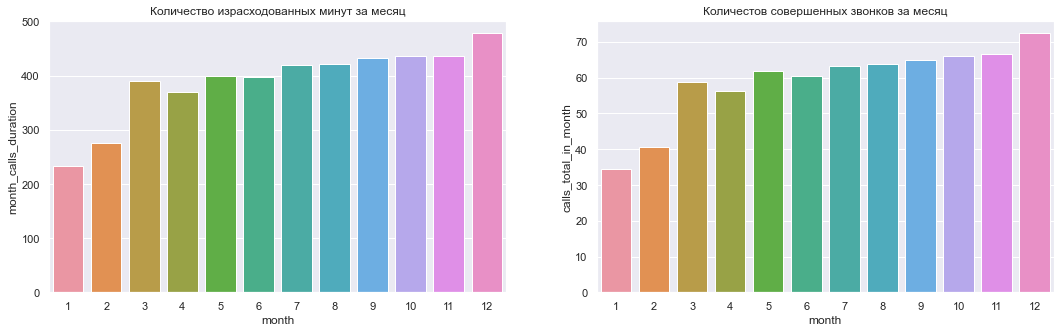

In [362]:
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.barplot(x = count_calls.month, y = count_calls.month_calls_duration, ax=ax[0], ci=None)
ax[0].set_title('Количество израсходованных минут за месяц')

sns.barplot(x = count_calls.month, y = count_calls.calls_total_in_month, ax=ax[1], ci=None)
ax[1].set_title('Количестов совершенных звонков за месяц')
plt.show()

Вывод:
- чаще всего связью пользуются в декабре (больше всего совершенных звонков и затраченных минут соотвественно);
- наиболее низкая активность в январе и феврале;
- больше всего звонков совершили пользователи с  user_id = 1467, 1377, 1216

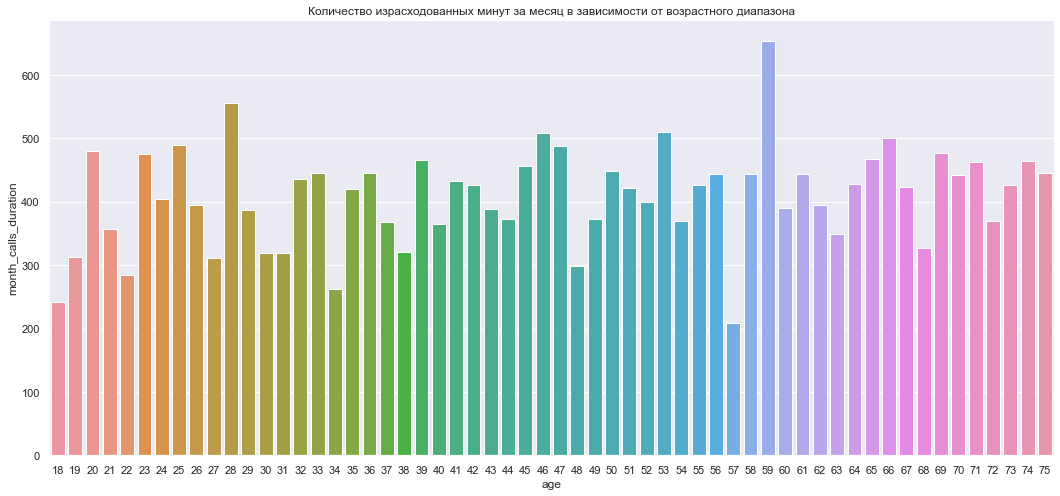

In [538]:
sns.set(rc={'figure.figsize': (18,8)})
kitchen = sns.barplot(x = df.age, y = df.month_calls_duration, ci=None)
kitchen.set_title('Количество израсходованных минут за месяц в зависимости от возрастного диапазона')
plt.show()

Вывод:
- явным лидером по длительности разговоров лица в возрасте 59 лет (быть может такая выборка попалась и это всего-лишь случайность)

Посмотрим на данные по использованию интернет - трафика, длительности звонков и количеству смс в разрезе городов - регионов, убрав из выборки Санкт - Петербург и Москву

In [562]:
reg = df.loc[(df['city'] != 'Москва') & (df['city'] != 'Санкт-Петербург')]

In [563]:
reg.groupby('city')\
                   .agg({'month_calls_duration':'sum'})\
                   .reset_index()\
                   .sort_values('month_calls_duration', ascending=False).head(10)

,city,month_calls_duration
65,Уфа,39146.0
64,Ульяновск,35668.0
24,Краснодар,34934.0
38,Новосибирск,34808.0
18,Казань,34000.0
48,Самара,30853.0
42,Пенза,29812.0
9,Волгоград,29810.0
43,Пермь,28341.0
32,Набережные Челны,27911.0


Вывод:
- интересно, что наряду с городами миллионниками в топ 10 вошли 
   - Набережные Челны (население 533 тч)
   - Пенза (население 520 тч)

In [556]:
reg.groupby('city')\
                   .agg({'month_calls_duration':'sum'})\
                   .reset_index()\
                   .sort_values('month_calls_duration', ascending=False).tail(10)

,city,month_calls_duration
0,Архангельск,4613.0
68,Чебоксары,3984.0
56,Сургут,3054.0
21,Кемерово,2671.0
7,Владикавказ,2407.0
28,Липецк,2269.0
33,Нижневартовск,1751.0
67,Химки,1492.0
10,Волжский,1451.0
15,Иваново,872.0


Вывод:
- самый низкий показатель, как правило и у город с меньшим населением, что в принципе объяснимо, ведь одно от другого коррелирует, но в тоже время хотелось бы отметить
    - Кемерово (население 556 тч)
    - Липецк (население 508 тч)
    - Чебоксары (население 497 тч)

### Количество отправленных сообщений по месяцам

In [363]:
messages['month'] = messages['message_date'].dt.month

In [364]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [365]:
count_messages = messages.groupby(['user_id', 'month'])\
                   .agg({'id':'count'})\
                   .reset_index()\
                   .rename(columns={'id':'mess_total_in_month'})\
                   .sort_values(['mess_total_in_month'], ascending=False)

In [366]:
count_messages.head()

,user_id,month,mess_total_in_month
866,1165,12,224
154,1028,10,223
1197,1231,7,211
1196,1231,6,201
865,1165,11,197


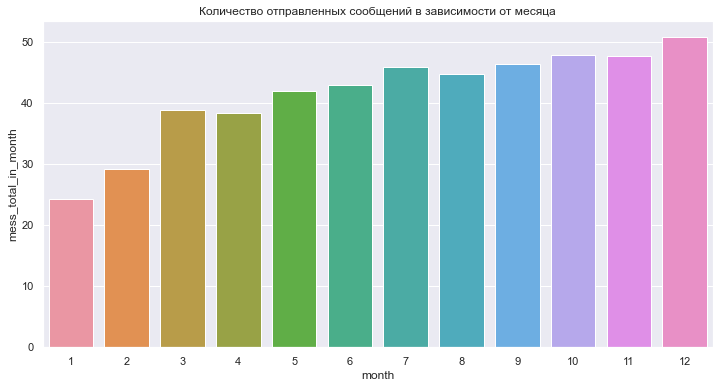

In [367]:
sns.set(rc={'figure.figsize': (12,6)})
fig = sns.barplot(x = count_messages.month, y = count_messages.mess_total_in_month, ci=None)
fig.set_title('Количество отправленных сообщений в зависимости от месяца')
plt.show()

Вывод:
- ситуация аналогична совершенным звонкам (наибольшее количество отправленных сообщений в декабре, наименьшее в январе, феврале);
- лидерами по отправленным сообщениям являются пользователи с user_id = 1165, 1028, 1231

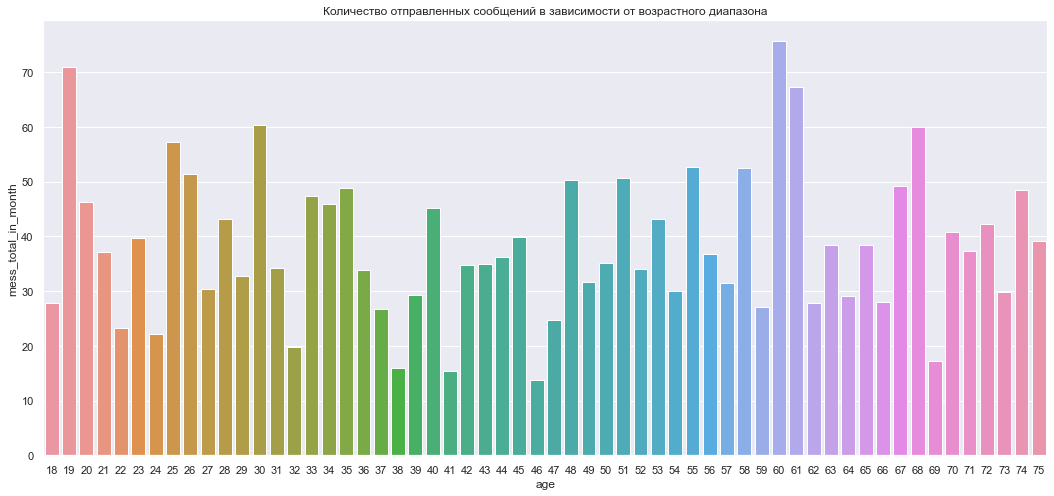

In [535]:
sns.set(rc={'figure.figsize': (18,8)})
kitchen = sns.barplot(x = df.age, y = df.mess_total_in_month, ci=None)
kitchen.set_title('Количество отправленных сообщений в зависимости от возрастного диапазона')
plt.show()

Вывод:
- чаще остальных смс пользуются люди более пожилого возраста от 47 лет

In [558]:
reg.groupby('city')\
                   .agg({'mess_total_in_month':'sum'})\
                   .reset_index()\
                   .sort_values('mess_total_in_month', ascending=False).head(10)

,city,mess_total_in_month
65,Уфа,5095.0
24,Краснодар,4223.0
38,Новосибирск,3723.0
64,Ульяновск,3346.0
36,Новокузнецк,2798.0
32,Набережные Челны,2789.0
12,Воронеж,2661.0
39,Омск,2642.0
17,Иркутск,2582.0
43,Пермь,2575.0


Вывод:
- по количеству отправленных смс, лидерами стали:
    - Набережные Челны (население 533 тч)
    - Иркутск (население 663 тч)

In [559]:
reg.groupby('city')\
                   .agg({'mess_total_in_month':'sum'})\
                   .reset_index()\
                   .sort_values('mess_total_in_month', ascending=False).tail(10)

,city,mess_total_in_month
66,Хабаровск,252.0
0,Архангельск,228.0
61,Тула,165.0
55,Стерлитамак,127.0
41,Орёл,111.0
3,Барнаул,110.0
10,Волжский,105.0
51,Севастополь,99.0
67,Химки,60.0
15,Иваново,42.0


Вывод:
- с низким количеством отправленных смс:
    - Хабаровск (население 616 тч)
    - Тула (население 475 тч)
    - Барнаул (население 632 тч)
    - Севастополь (население 449 тч)

### Объем израсходованного интернет-трафика по месяцам

In [368]:
internet['month'] = internet['session_date'].dt.month

In [369]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [370]:
count_internet = internet.groupby(['user_id', 'month'])\
                   .agg({'mb_used':'sum'})\
                   .reset_index()\
                   .rename(columns={'mb_used':'mb_total_in_month'})\
                   .sort_values(['mb_total_in_month'], ascending=False)

In [371]:
count_internet.head()

,user_id,month,mb_total_in_month
799,1124,10,49749.69
1524,1240,8,48353.59
1622,1255,7,45184.71
1901,1300,11,44296.86
383,1060,12,43934.36


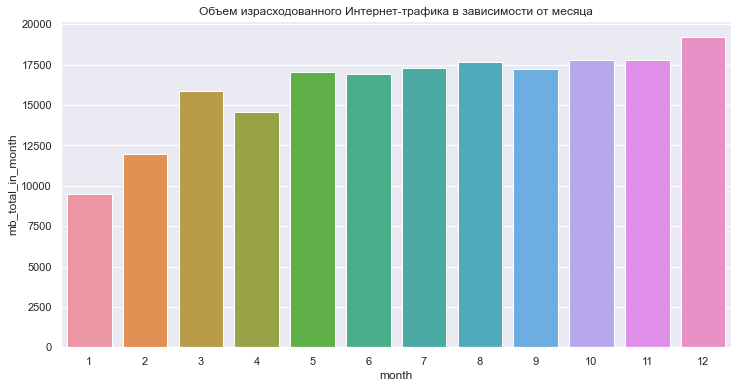

In [372]:
sns.set(rc={'figure.figsize': (12,6)})
fig = sns.barplot(x = count_internet.month, y = count_internet.mb_total_in_month, ci=None)
fig.set_title('Объем израсходованного Интернет-трафика в зависимости от месяца')
plt.show()

Вывод:
- в декабре больше всего израсходовали трафика (соотвественно в январе и феврале меньше всего);
- больше остальных Интернетом пользовались пользователи с user_id = 1124, 1240, 1255

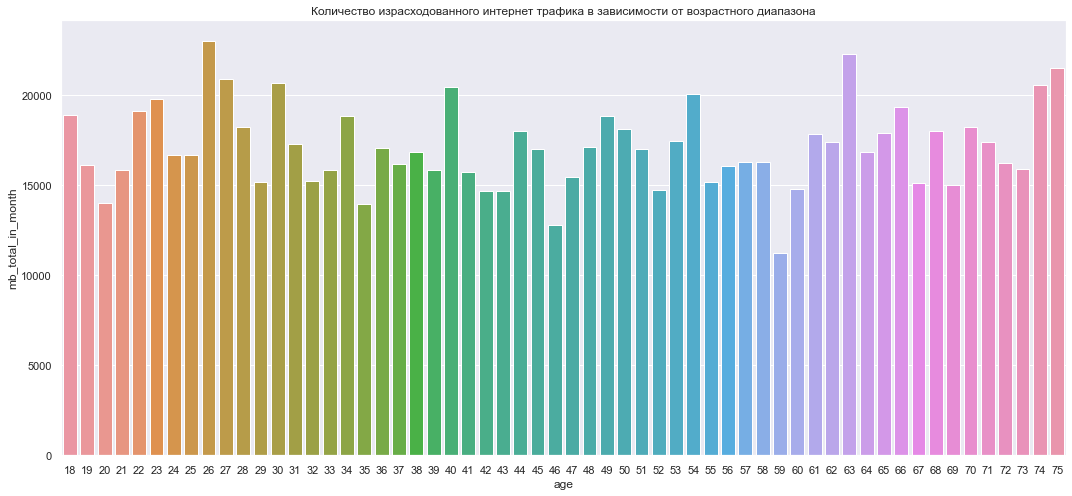

In [536]:
sns.set(rc={'figure.figsize': (18,8)})
kitchen = sns.barplot(x = df.age, y = df.mb_total_in_month, ci=None)
kitchen.set_title('Количество израсходованного интернет трафика в зависимости от возрастного диапазона')
plt.show()

Вывод:
- возраст никак не влияет на использование интернет трафика, что в 18, что в 70 лет люди одинаково часто пользуются Интернетом

In [560]:
reg.groupby('city')\
                   .agg({'mb_total_in_month':'sum'})\
                   .reset_index()\
                   .sort_values('mb_total_in_month', ascending=False).head(10)

,city,mb_total_in_month
38,Новосибирск,1773579.35
65,Уфа,1568686.57
64,Ульяновск,1336798.47
24,Краснодар,1207864.45
43,Пермь,1199868.03
18,Казань,1192841.43
39,Омск,1186246.08
9,Волгоград,1106075.60
34,Нижний Новгород,1095166.54
48,Самара,1043782.12


Вывод:
- по использованию интернет-трафика лидерами оказались города-миллионики (видимо это связано с хорошим интернет покрытием в этих городах)

In [561]:
reg.groupby('city')\
                   .agg({'mb_total_in_month':'sum'})\
                   .reset_index()\
                   .sort_values('mb_total_in_month', ascending=False).tail(10)

,city,mb_total_in_month
26,Курган,168985.40
45,Подольск,168873.25
7,Владикавказ,119525.63
10,Волжский,111645.03
28,Липецк,108600.67
56,Сургут,93403.81
21,Кемерово,78443.93
33,Нижневартовск,66049.73
67,Химки,61895.25
15,Иваново,30523.16


Вывод:
- с наиболее низкими показателями:
    - Липецк (население 508 тч)
    - Кемерово (население 556 тч)

### Месячная выручка с каждого пользователя

In [373]:
df = count_calls.merge(count_messages, on=['user_id','month'], how='outer')
df = df.merge(count_internet, on=['user_id','month'], how = 'outer')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,mess_total_in_month,mb_total_in_month
0,1467,12,1553.0,244.0,39.0,9757.90
1,1377,3,1486.0,203.0,20.0,3060.85
2,1216,12,1319.0,198.0,64.0,20076.05
3,1196,6,1294.0,176.0,153.0,22653.05
4,1377,10,1287.0,178.0,10.0,4880.62


In [374]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,mess_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1467,12,1553.0,244.0,39.0,9757.90,66,0,Киров,Исак,Александрюк,2018-11-24,ultra
1,1377,3,1486.0,203.0,20.0,3060.85,59,0,Брянск,Альфред,Семин,2018-02-25,ultra
2,1216,12,1319.0,198.0,64.0,20076.05,74,0,Волгоград,Рустам,Малинин,2018-11-23,smart
3,1196,6,1294.0,176.0,153.0,22653.05,25,0,Воронеж,Фёдор,Чернышев,2018-05-28,ultra
4,1377,10,1287.0,178.0,10.0,4880.62,59,0,Брянск,Альфред,Семин,2018-02-25,ultra


In [375]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [376]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [377]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,mess_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1467,12,1553.0,244.0,39.0,9757.90,66,0,Киров,Исак,Александрюк,2018-11-24,ultra,1000,30720,3000,1950,150,1,1
1,1377,3,1486.0,203.0,20.0,3060.85,59,0,Брянск,Альфред,Семин,2018-02-25,ultra,1000,30720,3000,1950,150,1,1
2,1216,12,1319.0,198.0,64.0,20076.05,74,0,Волгоград,Рустам,Малинин,2018-11-23,smart,50,15360,500,550,200,3,3
3,1196,6,1294.0,176.0,153.0,22653.05,25,0,Воронеж,Фёдор,Чернышев,2018-05-28,ultra,1000,30720,3000,1950,150,1,1
4,1377,10,1287.0,178.0,10.0,4880.62,59,0,Брянск,Альфред,Семин,2018-02-25,ultra,1000,30720,3000,1950,150,1,1


In [378]:
# посмотрим не появились-ли дубликаты при слиянии таблиц
df.duplicated().sum()

0

In [379]:
# посмотрим на количество пропущенных значений
df.isnull().sum()

user_id                    0
month                      0
month_calls_duration      40
calls_total_in_month      40
mess_total_in_month      497
mb_total_in_month         11
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mg_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

- интересно, что появились те, кто подключил тариф, но совсем не пользовался теми или иными услугами (звонки/ смс/ интернет)

In [380]:
# заменим на нулевые значения пользователям, кто совсем не пользовался услугами
df['mess_total_in_month'] = df['mess_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [381]:
def above_the_tariff(row):
    sms = (row['mess_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['mb_total_in_month'] - row['mg_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [382]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,mess_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1467,12,1553.0,244.0,39.0,9757.90,66,0,Киров,Исак,Александрюк,2018-11-24,ultra,1000,30720,3000,1950,150,1,1
1,1377,3,1486.0,203.0,20.0,3060.85,59,0,Брянск,Альфред,Семин,2018-02-25,ultra,1000,30720,3000,1950,150,1,1
2,1216,12,1319.0,198.0,64.0,20076.05,74,0,Волгоград,Рустам,Малинин,2018-11-23,smart,50,15360,500,550,200,3,3
3,1196,6,1294.0,176.0,153.0,22653.05,25,0,Воронеж,Фёдор,Чернышев,2018-05-28,ultra,1000,30720,3000,1950,150,1,1
4,1377,10,1287.0,178.0,10.0,4880.62,59,0,Брянск,Альфред,Семин,2018-02-25,ultra,1000,30720,3000,1950,150,1,1


In [383]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [384]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [385]:
df.sort_values(by='total_paid', ascending=False).head()

,user_id,month,month_calls_duration,calls_total_in_month,mess_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
81,1486,12,921.0,133.0,83.0,38569.45,35,0,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,5895.0,6445.0
53,1261,12,999.0,141.0,22.0,32670.91,46,0,Казань,Мадина,...,smart,50,15360,500,550,200,3,3,4878.0,5428.0
288,1486,11,709.0,108.0,96.0,36277.11,35,0,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,4850.0,5400.0
386,1042,12,669.0,121.0,75.0,37179.69,42,0,Хабаровск,Константин,...,smart,50,15360,500,550,200,3,3,4843.0,5393.0
363,1286,12,676.0,95.0,68.0,35126.07,19,0,Москва,Рашид,...,smart,50,15360,500,550,200,3,3,4442.0,4992.0


In [386]:
df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,3214.000000,3214.000000
mean,474.976042,1454.036403
std,706.700854,776.365375
min,0.000000,550.000000
25%,0.000000,648.250000
50%,68.000000,1493.000000
75%,796.000000,1950.000000
max,5895.000000,6445.000000


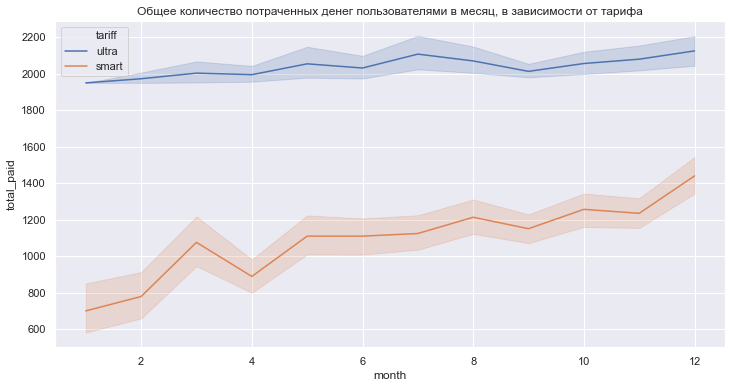

In [400]:
sns.lineplot(x='month', y='total_paid',
             hue='tariff', data=df)
plt.title('Общее количество потраченных денег пользователями в месяц, в зависимости от тарифа')
plt.show()

In [388]:
df.groupby('tariff')\
  .agg({'total_paid':['median','mean','var','std']})\
  .style.format("{:.2f}")

Вывод:
- пользователи тарифа смарт ежемесячно, в среднем, выходят за границы тарифа (примерно на 412 минут), тогда как пользователи тарифа ультра платят по тарифу, лишь частично выходят за границы стоимости тарифа

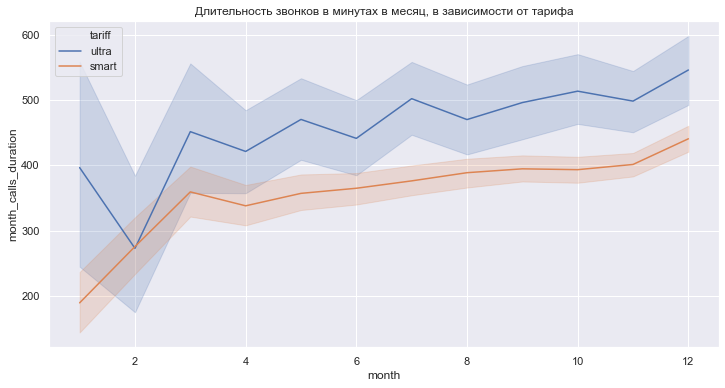

In [389]:
sns.lineplot(x='month', y='month_calls_duration',
             hue='tariff', data=df)
plt.title('Длительность звонков в минутах в месяц, в зависимости от тарифа')
plt.show()

In [390]:
df.groupby('tariff')\
  .agg({'month_calls_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

Вывод:
- на смарте люди говорят в среднем 390 минут (тем самым люди стараются уложиться в тарифные условия);
- на ультре у людей остаются еще значительный запас минут (около 2500 минут).

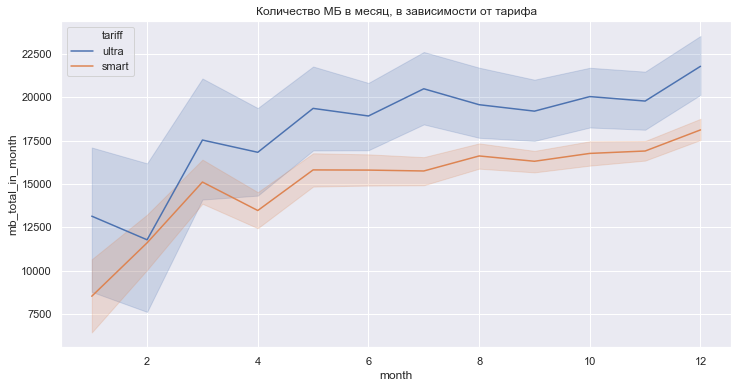

In [393]:
sns.lineplot(x='month', y='mb_total_in_month',
             hue='tariff', data=df)
plt.title('Количество МБ в месяц, в зависимости от тарифа')
plt.show()

In [392]:
df.groupby('tariff')\
  .agg({'mb_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Вывод:
- пользователи, использующие смарт выходят за грань тарифа, примерно на 1.6 Гб, в то время как те, кто используют тарифный план ультра имеют запас в 10 Гб ежемесячно;

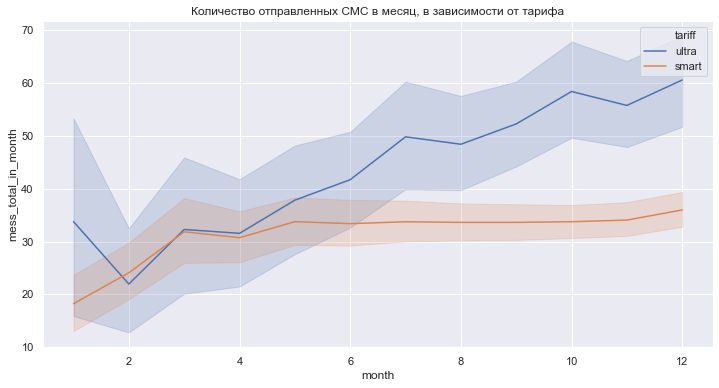

In [396]:
sns.lineplot(x='month', y='mess_total_in_month',
             hue='tariff', data=df)
plt.title('Количество отправленных СМС в месяц, в зависимости от тарифа')
plt.show()

In [397]:
df.groupby('tariff')\
  .agg({'mess_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Вывод:
- пользователи обоих тарифов не особо пользуются смс сообщениями

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем гипотезы:
- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

Перед тем, как применять тот или иной статистический метод, нам необходимо дать характеристику нашим данным. Например, чтобы использовать t критерий Стьюдента, данные должны подходить под следующие условия:
- данные должны иметь нормальное распределение (будем проверять, используя критерий Андерсона - Дарлинга);
- дисперсии в наших выборках должны быть гомогенны (будем проверять, используя критерий Бартлета);

### Проверяем распределения на нормальность

Сформулируем гипотезы:
- H0: закон распределения является нормальным
- H1: закон распределения не является нормальным

In [445]:
ultra = df[df['tariff']=='ultra']
smart = df[df['tariff']=='smart']

In [452]:
alpha = 0.05

In [480]:
ultra_distr = st.anderson(ultra.total_paid)

In [516]:
print(f'p-значение: {ultra_distr[1]}')

if (ultra_distr[1] < alpha):
    print("Применить гипотезу о нормальности")
else:
    print("Отклонить гипотезу о нормальности")

p-значение: 0.0
Применить гипотезу о нормальности


In [494]:
smart_distr = st.anderson(smart.total_paid)

In [499]:
print(f'p-значение: {smart_distr[1]}')
for i in smart_distr[1]:
    if (i < alpha):
        print("Применить гипотезу о нормальности")
    else:
        print("Отклонить гипотезу о нормальности")

p-значение: [0.575 0.655 0.786 0.916 1.09 ]
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности


Вывод:
- так как распределения выборок отличаются от нормального, то параметрический тест мы применить не можем. Для его применения необходимо привести выборки к нормальному распределению, либо применить непараметрический критерий (воспользуемся вторым случаем и применим непараметрический критерий Манна - Уитни

In [505]:
t_mannwhitneyu = st.mannwhitneyu(smart.total_paid, ultra.total_paid)

In [525]:
print(f'p-значение: {t_mannwhitneyu[1]}')

if (t_mannwhitneyu[1] < alpha):
    print("Отклонить H0")
else:
    print("Применить H0")

p-значение: 2.71835514382168e-237
Отклонить H0


Вывод:
- Разница не случайна, есть значимые различия между выборками

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем гипотезы:
- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [510]:
moscow = df[df['city']== 'Москва']

In [511]:
regions = df[df['city']!='Москва']

### Проверяем распределения на нормальность

Сформулируем гипотезы:
- H0: закон распределения является нормальным
- H1: закон распределения не является нормальным

In [514]:
moscow_distr = st.anderson(moscow.total_paid)

In [517]:
print(f'p-значение: {moscow_distr[1]}')

for i in moscow_distr[1]:
    if (i < alpha):
        print("Применить гипотезу о нормальности")
    else:
        print("Отклонить гипотезу о нормальности")

p-значение: [0.572 0.652 0.782 0.912 1.085]
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности


In [518]:
regions_distr = st.anderson(regions.total_paid)

In [519]:
print(f'p-значение: {regions_distr[1]}')

for i in regions_distr[1]:
    if (i < alpha):
        print("Применить гипотезу о нормальности")
    else:
        print("Отклонить гипотезу о нормальности")

p-значение: [0.575 0.655 0.786 0.917 1.09 ]
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности
Отклонить гипотезу о нормальности


In [523]:
t_mannwhitneyu_2 = st.mannwhitneyu(moscow.total_paid, regions.total_paid)

In [526]:
print(f'p-значение: {t_mannwhitneyu_2[1]}')

if (t_mannwhitneyu_2[1] < alpha):
    print("Отклонить H0")
else:
    print("Применить H0")

p-значение: 0.10998626567772124
Применить H0


Вывод:
- с вероятностью в 10% такой результат может быть получен случайно. Значимых различий нет.

### Общий вывод:

- пользователи чаще всего пользуются связью в декабре (это отражается как на потраченных минутах, так и на использовании интернет трафика). Реже всего январь - февраль (как вариант на первый квартал года определить новые акции по пользованию сотовой связью и пользователям, кто реже всего использует сотовую связь направлять пуш-уведомления об этих акциях (напоминать о себе));
- пользователи тарифа "Смарт" чаще выходят за предоставленный лимит, а это соотвественно переплата, что в свою очередь может привести к оттоку пользователей.
- города-регионы, которые являются лидерами по количеству израсходованных минут в обоих тарифах (в расчет берутся города с населением более 500 тысяч и менее 1 млн человек):
   - Пенза, Набережные Челны
- города-регионы, которые реже остальных пользовались звонками в обоих тарифах (в расчет берутся города с населением более 500 тысяч и менее 1 млн человек):
   - Кемерово, Липецк, Чебоксары
- города-регионы, которые являются лидерами по количеству отправленных сообщений в обоих тарифах (в расчет берутся города с населением более 500 тысяч и менее 1 млн человек):
   - Набережные Челны, Иркутск 
- города-регионы, которые реже остальных отправляли сообщения в обоих тарифах (в расчет берутся города с населением более 500 тысяч и менее 1 млн человек):
   - Хабаровск, Тула, Барнаул, Севастополь
- города-регионы, которые являются лидерами по использованию интернет-трафика сообщений в обоих тарифах (в расчет берутся города с населением более 500 тысяч и менее 1 млн человек):
   - города-миллионики, видимо это связано с тем, что в административных центрах своих регионов хорошее интернет-покрытие и пользователи активно пользуются им 
- города-регионы, которые реже остальных пользуются интернет-трафика в обоих тарифах (в расчет берутся города с населением более 500 тысяч и менее 1 млн человек):
   - Липецк, Кемерово
В соотвествии с выше сказанным хотелось бы сделать заключение о необходимости внесения изменений в сотовые сети Кемеровской области (низкие показатели по количеству смс и интернет-трафику, в том числе на Привольже России (Липецкая, Тульская области)
- тарифы приносят разную вырочку, различия в статистической значимости есть.